### Loan Defualt Prediction with ML 
Part 1. Extract Transform and Load Data (ETL).


#### Import Packages

In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 26 12:41:15 2024

@author: Felipe J

Loan Defualt Prediction with ML pt.1, ETL.

Completed with Corporate Finance Institute CFI.

"""
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Import Data Set
loan_df = pd.read_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans.csv',
                      index_col='UNIQUEID')

#### Visualize and Understand Data
This dataset consists of 40 columns (40 potential features) and 233k rows of data for each feature.

In [60]:
### ETL – explore the data.
loan_df.info()     # Look at column types (e.g. 'Employment_Type' has na values, others do not).
                   # It also shows how many and which columns are categorical ('object')– not memory efficient.
loan_df.shape      # Rows and columns
loan_df.nunique()  # number of unique vals per column
loan_df.describe() # Descriptive stats for each column
print("Number of rows:", loan_df.shape[0])
print("Number of columns", loan_df.shape[1])

loan_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [61]:
#%% Columns that need cleaning

# Column 'DISBURSAL_DATE' contains dates in which loans were granted (timeframe of data)

loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'], format='%d-%m-%Y') # Convert disbursal date. 
print("Maximum Disbursal Date:", loan_df['DISBURSAL_DATE'].max())     # Get minimum and 
print("Maximum Disbursal Date:", loan_df['DISBURSAL_DATE'].min())     # maximum date.

# We can perfrom mathematical operations on pd.to_datetime data.
print("Timespan of Data Set", loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())



Maximum Disbursal Date: 2018-10-31 00:00:00
Maximum Disbursal Date: 2018-08-01 00:00:00
Timespan of Data Set 91 days 00:00:00


#### Visualize Target Variable

<AxesSubplot:xlabel='LOAN_DEFAULT', ylabel='count'>

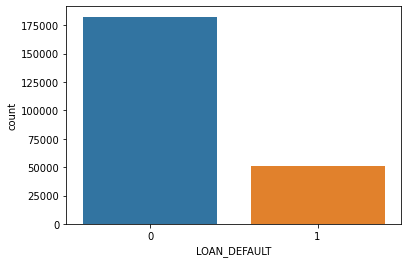

In [62]:
# Target Variable 'LOAN_DEFAULT'
loan_df['LOAN_DEFAULT'].value_counts() # 0=payed loan on time, 1=defualted on loan.

# Visualize Target Variable. 
sns.countplot(x=loan_df['LOAN_DEFAULT'], data=loan_df)

In [63]:
loan_df['LOAN_DEFAULT'].value_counts()
print('Number of non-defaults in data:', loan_df['LOAN_DEFAULT'].value_counts()[0])
print('Number of defaults in data:', loan_df['LOAN_DEFAULT'].value_counts()[1])
percentages = loan_df['LOAN_DEFAULT'].value_counts(normalize=True)      # Express it as a precentage.
print(f"non-default rate: {percentages[0]*100:.2f}%, default rate: {percentages[1]*100:.2f}%")
                                                                        # Rate of default is 21%.

Number of non-defaults in data: 182543
Number of defaults in data: 50611
non-default rate: 78.29%, default rate: 21.71%


#### Deal with Missing Values

<AxesSubplot:xlabel='EMPLOYMENT_TYPE', ylabel='count'>

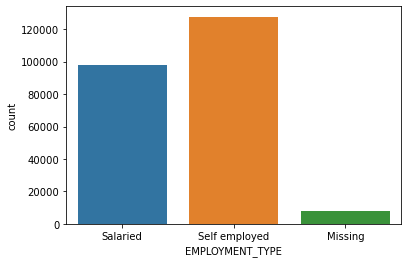

In [64]:
# Missing values – find and replace.
loan_df.isnull().any() # Find with True or False if any null values per column
loan_df.isnull().sum() # Get the amount of null values per columns

# Fill null values.
loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE':'Missing'}) # .fillna values allows us to replace missing vals.
# If we do a countplot of 'Employment_Type' now, we'll note we added a third category called 'Missing'
sns.countplot(x='EMPLOYMENT_TYPE', data=loan_df)

In [65]:
# Exploring Date Columns

# We have 'Disbursal_Date' and 'Date_of_Birth', and we know a potentially useful variable would be Age. So,
# with this information, we can create a new column 'Age'.
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'], format='%d-%m-%Y')
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH'] # Caluclate their age at time of disbursal.
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')             # np.timedelta64(1, 'Y') will convert days --> years.
                                                                      # Now we have a new column in our df with the Age of borrowers.

# We found earlier that all of our data was from 2018, but the loans were given in different months. We can rapidly
# create a new column for month in which loan was granted to see if it has any relationship to (Y).
loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month
loan_df['DISBURSAL_MONTH'].value_counts()
loan_df = loan_df.drop(columns=['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1) # Since we added cols, 'Disbursal_Month' 
                                                                            # and 'AGE", we can drop the other columns 


In [66]:
# Some columns are supposed to be numerical but were formatted as ' #yrs#mon ' which is a string. Fix.
loan_df[['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE']].sample(n=10) # Validate the format is wrong.

# Extract relevant values from the original string data
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+') # '\d+' is an expression which finds integers
print(loan_df['AVERAGE_ACCT_AGE_MONTHS'].sample(n=10))                              # in a string, '.findall' finds all
                                                                                    # instances of a string in a column.
# Create funtion to caluclate the total months based on list of input strings.
def calc_months(str_list):
    years = int(str_list[0])
    months = int(str_list[1])
    num_months = (years*12) + months
    return num_months

# Use function calc_months to structure our data.                    
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(calc_months) # Now total months has been to a 
                                                                                         # new column 'Average_Acct_Age_Months'
# Column 'Credit_History_Length'
def convert_str_to_months(col_name): 
    new_col = col_name + '_MONTHS'   # This function makes our other function reproducible with any new column that we input.
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)
convert_str_to_months('CREDIT_HISTORY_LENGTH') # Converted.

loan_df = loan_df.drop(columns=(['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE']), axis=1) # Drop og columns which we just changed.

# One more categorical column to investigate: 'PERFRORM_CNS_SCORE_DESCRIPTION'
loan_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts() # Run to investigate it. 
                                                        # Column is filled with different categories.  

# We'll do this in Exploratory Data Analysis EDA section. 

UNIQUEID
517641     [0, 0]
437830     [0, 5]
453832    [0, 10]
465571     [0, 0]
514935     [1, 0]
537279     [0, 2]
630582     [0, 7]
566178     [0, 0]
547461     [0, 3]
456619     [0, 3]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object


No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

#### Summary

In [69]:
# Save cleaned data into csv using '.to_csv'
loan_df.to_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans_clean.csv',)

"""Summary:
* Identified Target Variable
* Dealt with missing data, data formats, and converted several columns into potentially useful features. 
* Transformed our data frame by modifiying, dropping, adding columns.
"""

'Summary:\n* Identified Target Variable\n* Dealt with missing data, data formats, and converted several columns into potentially useful features. \n* Transformed our data frame by modifiying, dropping, adding columns.\n'